In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [107]:
df = pd.read_csv("../data/final.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30700 entries, 0 to 30699
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              30700 non-null  int64 
 1   investigation_type      30700 non-null  object
 2   event_date              30700 non-null  object
 3   location                30700 non-null  object
 4   country                 30700 non-null  object
 5   injury_severity         30700 non-null  object
 6   aircraft_damage         30700 non-null  object
 7   aircraft_category       30700 non-null  object
 8   make                    30700 non-null  object
 9   model                   30698 non-null  object
 10  number_of_engines       30700 non-null  int64 
 11  engine_type             30700 non-null  object
 12  purpose_of_flight       30700 non-null  object
 13  total_fatal_injuries    30700 non-null  int64 
 14  total_serious_injuries  30700 non-null  int64 
 15  to

In [108]:

model_counts = df.groupby(['make', 'model']).size().reset_index(name='count')

top_100_models = model_counts.sort_values(by='count', ascending=False).head(100)
top_100_models

,make,model,count
1954,Cessna,172,816
1248,Boeing,737,477
1944,Cessna,152,381
1987,Cessna,172S,328
2016,Cessna,182,318
...,...,...,...
5352,Mooney,M20E,50
2338,Cessna,U206,49
1977,Cessna,172H,49
6095,Piper,Pa44180,49


In [125]:
df['total_fatal_injuries'] = pd.to_numeric(df['total_fatal_injuries'], errors='coerce')

accident_counts = df['make_model'].value_counts()

fatal_counts = df[df['total_fatal_injuries'] > 0]['make_model'].value_counts()

fatality_rate = (fatal_counts / accident_counts) * 100

most_sample = accident_counts.idxmax()

most_samples_data = df[df['make_model'] == most_sample]

most_samples_data

cessna_model = 'Piper Pa46 '

cessna_data = df_filtered[(df_filtered['make'] == 'Piper') & (df_filtered['model'] == 'Pa46')]

fatality_rate = cessna_data['fatality_rate'].values[0]

print(f"The fatality rate for {cessna_model} is: {fatality_rate}")


The fatality rate for Piper Pa46  is: 0.734375


In [110]:
Make_Model= ['Beech A36', 'Piper Pa46', 'Cessna 208B', 'Cessna A185']
filtered_df = df[df['make_model'].isin(Make_Model)]

accident_count = filtered_df.groupby('year')['accident_number'].count()

accident_count = filtered_df.groupby(['year', 'month'])['accident_number'].count()

KeyError: 'Column not found: accident_number'

In [111]:

specific_entries ['Beech A36', 'Piper Pa46', 'Cessna 208B', 'Cessna A185']
filtered_df = df[df['make_model'].isin(Make_Model)]


accident_count = filtered_df.groupby('year')['accident_count'].count()

accident_count = filtered_df.groupby(['year', 'month'])['accident_count'].count()

# Group the filtered DataFrame by year and count the number of accidents in each year
accident_count = filtered_df.groupby('year')['accident_count'].count()

# Optionally, group by both year and month
# accident_count = filtered_df.groupby(['year', 'month'])['accident_number'].count()

# Create a time series plot
plt.plot(accident_count.index, accident_count.values)
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.title('Accident Count by Year')
plt.xticks(rotation=45)
plt.show()

TypeError: list indices must be integers or slices, not tuple

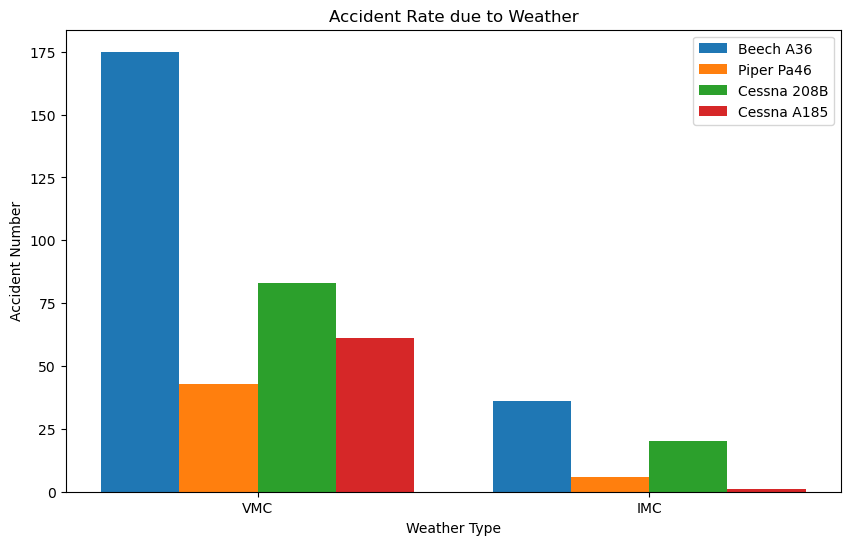

In [112]:
make1 = 'Beech'
model1 = 'A36'
make2 = 'Piper'
model2 = 'Pa46'
make3 = 'Cessna'
model3 = '208B'
make4 = 'Cessna'
model4 = 'A185'

make1_model1_data = df[(df['make'] == make1) & (df['model'] == model1)]
make2_model2_data = df[(df['make'] == make2) & (df['model'] == model2)]
make3_model3_data = df[(df['make'] == make3) & (df['model'] == model3)]
make4_model4_data = df[(df['make'] == make4) & (df['model'] == model4)]

categories = ['VMC', 'IMC']
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(np.arange(len(categories)), make1_model1_data['weather_condition'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make1} {model1}')
bar2 = ax.bar(np.arange(len(categories)) + bar_width, make2_model2_data['weather_condition'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make2} {model2}')
bar3 = ax.bar(np.arange(len(categories)) + 2 * bar_width, make3_model3_data['weather_condition'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make3} {model3}')
bar4 = ax.bar(np.arange(len(categories)) + 3 * bar_width, make4_model4_data['weather_condition'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make4} {model4}')

ax.set_xlabel('Weather Type')
ax.set_ylabel('Accident Number')
ax.set_title(f'Accident Rate due to Weather')
ax.set_xticks(np.arange(len(categories)) + 1.5 * bar_width)
ax.set_xticklabels (categories)
ax.legend()

plt.show()

In [ ]:
df.info()

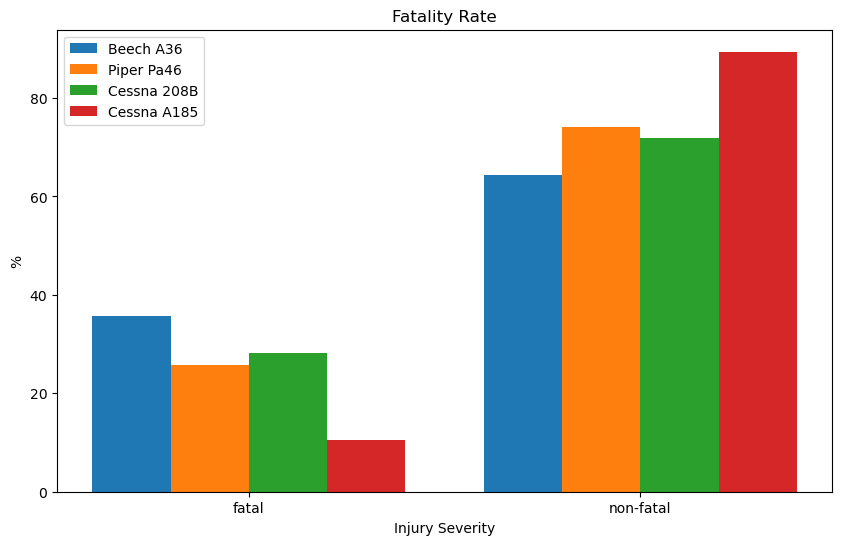

In [113]:
import matplotlib.ticker as mtick

make1 = 'Beech'
model1 = 'A36'
make2 = 'Piper'
model2 = 'Pa46'
make3 = 'Cessna'
model3 = '208B'
make4 = 'Cessna'
model4 = 'A185'

make1_model1_data = df[(df['make'] == make1) & (df['model'] == model1)]
make2_model2_data = df[(df['make'] == make2) & (df['model'] == model2)]
make3_model3_data = df[(df['make'] == make3) & (df['model'] == model3)]
make4_model4_data = df[(df['make'] == make4) & (df['model'] == model4)]

total1 = make1_model1_data['weather_condition'].value_counts().sum()
total2 = make2_model2_data['weather_condition'].value_counts().sum()
total3 = make3_model3_data['weather_condition'].value_counts().sum()
total4 = make4_model4_data['weather_condition'].value_counts().sum()

categories = ['fatal', 'non-fatal']
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(np.arange(len(categories)), (make1_model1_data['injury_severity'].value_counts().reindex(categories, fill_value=0) / total1) * 100, bar_width, label=f'{make1} {model1}')
bar2 = ax.bar(np.arange(len(categories)) + bar_width, (make2_model2_data['injury_severity'].value_counts().reindex(categories, fill_value=0) / total2) * 100, bar_width, label=f'{make2} {model2}')
bar3 = ax.bar(np.arange(len(categories)) + 2 * bar_width, (make3_model3_data['injury_severity'].value_counts().reindex(categories, fill_value=0) / total3) * 100, bar_width, label=f'{make3} {model3}')
bar4 = ax.bar(np.arange(len(categories)) + 3 * bar_width, (make4_model4_data['injury_severity'].value_counts().reindex(categories, fill_value=0) / total4) * 100, bar_width, label=f'{make4} {model4}')

ax.set_xlabel('Injury Severity')
ax.set_ylabel('%')
ax.set_title(f'Fatality Rate')
ax.set_xticks(np.arange(len(categories)) + 1.5 * bar_width)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


In [ ]:
make1 = 'Piper'
model1 = 'J3C65'
make2 = 'Piper'
model2 = 'Pa31350'
make3 = 'Cessna'
model3 = '172H'
make4 = 'Cessna'
model4 = '172S'

make1_model1_data = df[(df['make'] == make1) & (df['model'] == model1)]
make2_model2_data = df[(df['make'] == make2) & (df['model'] == model2)]
make3_model3_data = df[(df['make'] == make3) & (df['model'] == model3)]
make4_model4_data = df[(df['make'] == make4) & (df['model'] == model4)]

categories = ['fatal', 'non-fatal']
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(np.arange(len(categories)), make1_model1_data['injury_severity'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make1} {model1}')
bar2 = ax.bar(np.arange(len(categories)) + bar_width, make2_model2_data['injury_severity'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make2} {model2}')
bar3 = ax.bar(np.arange(len(categories)) + 2 * bar_width, make3_model3_data['injury_severity'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make3} {model3}')
bar4 = ax.bar(np.arange(len(categories)) + 3 * bar_width, make4_model4_data['injury_severity'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make4} {model4}')

ax.set_xlabel('Injury Severity')
ax.set_ylabel('Accident Number')
ax.set_title(f'Comparison of {make1} {model1}, {make2} {model2}, {make3} {model3}, and {make4} {model4} by Injury Severity')
ax.set_xticks(np.arange(len(categories)) + 1.5 * bar_width)
ax.set_xticklabels (categories)
ax.legend()

plt.show()

In [ ]:
make1 = 'Beech'
model1 = '58'
make2 = 'Piper'
model2 = 'Pa31350'

make1_model1_data = df[(df['make'] == make1) & (df['model'] == model1)]
make2_model2_data = df[(df['make'] == make2) & (df['model'] == model2)]

categories = ['Substantial', 'Minor', 'Substantial']
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(np.arange(len(categories)), make1_model1_data['aircraft_damage'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make1} {model1}')
bar2 = ax.bar(np.arange(len(categories)) + bar_width, make2_model2_data['aircraft_damage'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make2} {model2}')

ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Number of Accidents')
ax.set_title(f'Comparison of {make1} {model1} and {make2} {model2} by Aircraft Damage')
ax.set_xticks(np.arange(len(categories)) + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

In [ ]:
make1 = 'Beech'
model1 = '58'
make2 = 'Piper'
model2 = 'Pa34'

make1_model1_data = df[(df['make'] == make1) & (df['model'] == model1)]
make2_model2_data = df[(df['make'] == make2) & (df['model'] == model2)]

categories = ['fatal', 'non-fatal']
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(np.arange(len(categories)), make1_model1_data['injury_severity'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make1} {model1}')
bar2 = ax.bar(np.arange(len(categories)) + bar_width, make2_model2_data['injury_severity'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make2} {model2}')

ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title(f'Fatality percentage of accidents by Fatality')
ax.set_xticks(np.arange(len(categories)) + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

Top 100 models

In [ ]:
df = pd.read_csv("../data/top_100_models.csv")
df.info()

SEATS WITH 6 AND ABOVE

In [ ]:
df_filtered = df[(df['num_seats'] >= 6) & (df['num_seats'] <= 20)]
df_filtered

In [ ]:

num_entries = len(df[df['make'] == 'Piper'])
print(num_entries)

In [ ]:
df_filtered['make'].unique()

Air_craftf_condition By Make for each Model

In [ ]:
make1 = 'Piper'
model1 = 'J3C65'
make2 = 'Piper'
model2 = 'Pa31350'
make3 = 'Cessna'
model3 = '172H'
make4 = 'Cessna'
model4 = '172S'

make1_model1_data = df_filtered[(df_filtered['make'] == make1) & (df_filtered['model'] == model1)]
make2_model2_data = df_filtered[(df_filtered['make'] == make2) & (df_filtered['model'] == model2)]
make3_model3_data = df_filtered[(df_filtered['make'] == make3) & (df_filtered['model'] == model3)]
make4_model4_data = df_filtered[(df_filtered['make'] == make4) & (df_filtered['model'] == model4)]

bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(np.arange(len(categories)), make1_model1_data['fatality_rate'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make1} {model1}')
bar2 = ax.bar(np.arange(len(categories)) + bar_width, make2_model2_data['fatality_rate'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make2} {model2}')
bar3 = ax.bar(np.arange(len(categories)) + 2 * bar_width, make3_model3_data['fatality_rate'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make3} {model3}')
bar4 = ax.bar(np.arange(len(categories)) + 3 * bar_width, make4_model4_data['fatality_rate'].value_counts().reindex(categories, fill_value=0), bar_width, label=f'{make4} {model4}')

ax.set_xlabel('Injury Severity')
ax.set_ylabel('Accident Number')
ax.set_title(f'Comparison of {make1} {model1}, {make2} {model2}, {make3} {model3}, and {make4} {model4} by Injury Severity')
ax.set_xticks(np.arange(len(categories)) + 1.5 * bar_width)
ax.set_xticklabels (categories)
ax.legend()

plt.show()

In [ ]:
import matplotlib.ticker as mtick

unique_makes = df_filtered['make'].unique()

fig, ax = plt.subplots(figsize=(10, 6))

for make in unique_makes:
    make_data = df_filtered[df_filtered['make'] == make]
    
    ax.bar(make_data['make'], make_data['fatality_rate'], label=make)

ax.set_xlabel('Make')
ax.set_ylabel('Fatality Rate')
ax.set_title('Fatality Rate by Make')
ax.legend()

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

unique_makes = df_filtered['make'].unique()

categories = ['Fatal', 'Minor', 'Serious']
bar_width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))

for i, make in enumerate(unique_makes):
    make_data = df_filtered[df_filtered['make'] == make]

    bar1 = ax.bar(np.arange(len(make_data)) + (i * bar_width), make_data['avg_fatal_injuries'], bar_width, label=f'{make} - Fatal')
    bar2 = ax.bar(np.arange(len(make_data)) + (i * bar_width), make_data['avg_minor_injuries'], bar_width, bottom=make_data['avg_fatal_injuries'], label=f'{make} - Minor')
    bar3 = ax.bar(np.arange(len(make_data)) + (i * bar_width), make_data['avg_serious_injuries'], bar_width, bottom=make_data['avg_fatal_injuries'] + make_data['avg_minor_injuries'], label=f'{make} - Serious')

ax.set_xlabel('Make and Model')
ax.set_ylabel('Average Injury Severity')
ax.set_title('Comparison of Average Injury Severity per Accident')
ax.set_xticks(np.arange(len(df_filtered)))
ax.set_xticklabels(df_filtered['make'] + ' ' + df_filtered['model'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
make1 = 'Piper'
model1 = 'J3C65'
make2 = 'Piper'
model2 = 'Pa31350'
make3 = 'Cessna'
model3 = '172H'
make4 = 'Cessna'
model4 = '172S'

make1_model1_data = df_filtered[(df_filtered['make'] == make1) & (df_filtered['model'] == model1)]
make2_model2_data = df_filtered[(df_filtered['make'] == make2) & (df_filtered['model'] == model2)]
make3_model3_data = df_filtered[(df_filtered['make'] == make3) & (df_filtered['model'] == model3)]
make4_model4_data = df_filtered[(df_filtered['make'] == make4) & (df_filtered['model'] == model4)]

categories = [f'{make1} {model1}', f'{make2} {model2}', f'{make3} {model3}', f'{make4} {model4}']
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(np.arange(len(categories)), make1_model1_data['fatality_rate'], bar_width, label=f'{make1} {model1}')
bar2 = ax.bar(np.arange(len(categories)) + bar_width, make2_model2_data['fatality_rate'], bar_width, label=f'{make2} {model2}')
bar3 = ax.bar(np.arange(len(categories)) + 2 * bar_width, make3_model3_data['fatality_rate'], bar_width, label=f'{make3} {model3}')
bar4 = ax.bar(np.arange(len(categories)) + 3 * bar_width, make4_model4_data['fatality_rate'], bar_width, label=f'{make4} {model4}')

ax.set_xlabel('Make and Model')
ax.set_ylabel('Fatality Rate')
ax.set_title('Comparison of Make and Model by Fatality Rate')
ax.set_xticks(np.arange(len(categories)) + 1.5 * bar_width)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

In [ ]:
make1 = 'Piper'
model1 = 'J3C65'
make2 = 'Piper'
model2 = 'Pa31350'
make3 = 'Cessna'
model3 = '172H'
make4 = 'Cessna'
model4 = '172S'

make1_model1_data = df_filtered[(df_filtered['make'] == make1) & (df_filtered['model'] == model1)]
make2_model2_data = df_filtered[(df_filtered['make'] == make2) & (df_filtered['model'] == model2)]
make3_model3_data = df_filtered[(df_filtered['make'] == make3) & (df_filtered['model'] == model3)]
make4_model4_data = df_filtered[(df_filtered['make'] == make4) & (df_filtered['model'] == model4)]

categories = [f'{make1} {model1}', f'{make2} {model2}', f'{make3} {model3}', f'{make4} {model4}']
fatality_rates = [make1_model1_data['fatality_rate'].values[0], make2_model2_data['fatality_rate'].values[0], make3_model3_data['fatality_rate'].values[0], make4_model4_data['fatality_rate'].values[0]]
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(np.arange(len(categories)), fatality_rates, bar_width)

ax.set_xlabel('Make and Model')
ax.set_ylabel('Fatality Rate')
ax.set_title('Comparison of Make and Model by Fatality Rate')
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)
ax.legend(bars, fatality_rates)

plt.show()

In [ ]:
make1 = 'Piper'
make2 = 'Cessna'

make1_data = df_filtered[df_filtered['make'] == make1]
make2_data = df_filtered[df_filtered['make'] == make2]

categories = [make1, make2]
fatality_rates = [make1_data['fatality_rate'].mean(), make2_data['fatality_rate'].mean()]
bar_width = 0.2

fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(np.arange(len(categories)), fatality_rates, bar_width)

ax.set_xlabel('Make')
ax.set_ylabel('Fatality Rate')
ax.set_title('Comparison of Make by Fatality Rate')
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)

# Displaying the fatality rate on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, round(fatality_rates[i], 2), ha='center', va='bottom')

plt.show()

In [ ]:
model1 = 'J3C65'
model2 = 'Pa31350'
model3 = '172H'
model4 = '172S'

model1_data = df_filtered[df_filtered['model'] == model1]
model2_data = df_filtered[df_filtered['model'] == model2]
model3_data = df_filtered[df_filtered['model'] == model3]
model4_data = df_filtered[df_filtered['model'] == model4]

categories = [model1, model2, model3, model4]
fatality_rates = [model1_data['fatality_rate'].mean(), model2_data['fatality_rate'].mean(), model3_data['fatality_rate'].mean(), model4_data['fatality_rate'].mean()]
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(np.arange(len(categories)), fatality_rates, bar_width)

ax.set_xlabel('Model')
ax.set_ylabel('Fatality Rate')
ax.set_title('Comparison of Model by Fatality Rate')
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)

# Displaying the fatality rate on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, round(fatality_rates[i], 2), ha='center', va='bottom')

plt.show()

In [ ]:

make_data = df_filtered[df_filtered['make'] == 'Piper']

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(make_data['model'], make_data['fatality_rate'])

ax.set_xlabel('Model')
ax.set_ylabel('Fatality Rate')
ax.set_title('Fatality Rate for Piper Models')

# Format y-axis as percentage

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

make_data = df_filtered[df_filtered['make'] == 'Beech']

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(make_data['model'], make_data['fatality_rate'])

ax.set_xlabel('Model')
ax.set_ylabel('Fatality Rate')
ax.set_title('Fatality Rate for Beech Models')

# Format y-axis as percentage

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [124]:
cessna_model = 'Piper Pa46 '

cessna_data = df_filtered[(df_filtered['make'] == 'Piper') & (df_filtered['model'] == 'Pa46')]

fatality_rate = cessna_data['fatality_rate'].values[0]

print(f"The fatality rate for {cessna_model} is: {fatality_rate}")

The fatality rate for Piper Pa46  is: 0.734375


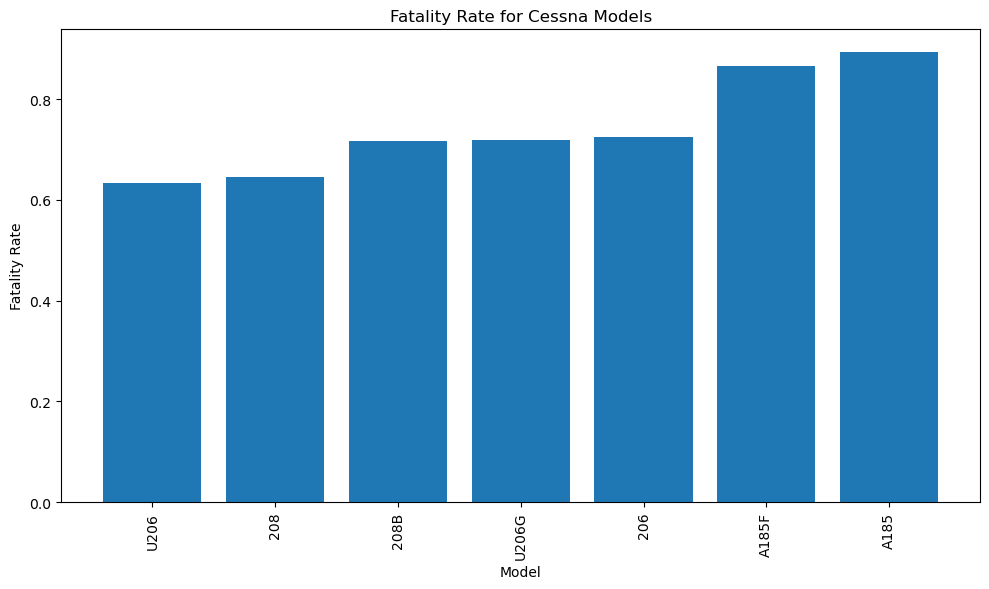

In [116]:
make_data = df_filtered[df_filtered['make'] == 'Cessna']

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(make_data['model'], make_data['fatality_rate'])

ax.set_xlabel('Model')
ax.set_ylabel('Fatality Rate')
ax.set_title('Fatality Rate for Cessna Models')

# Format y-axis as percentage


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

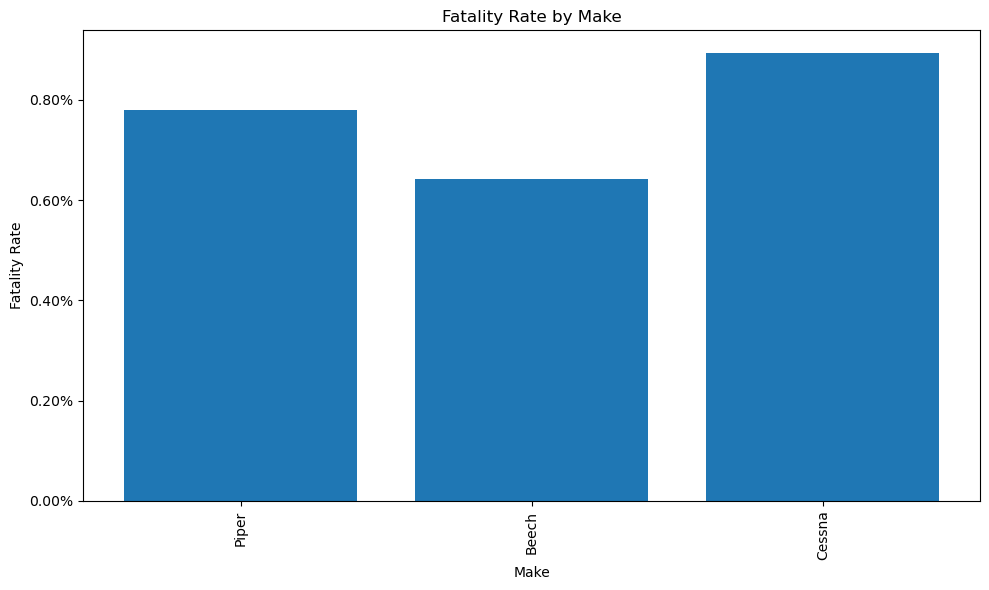

In [115]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df_filtered['make'], df_filtered['fatality_rate'])

ax.set_xlabel('Make')
ax.set_ylabel('Fatality Rate')
ax.set_title('Fatality Rate by Make')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

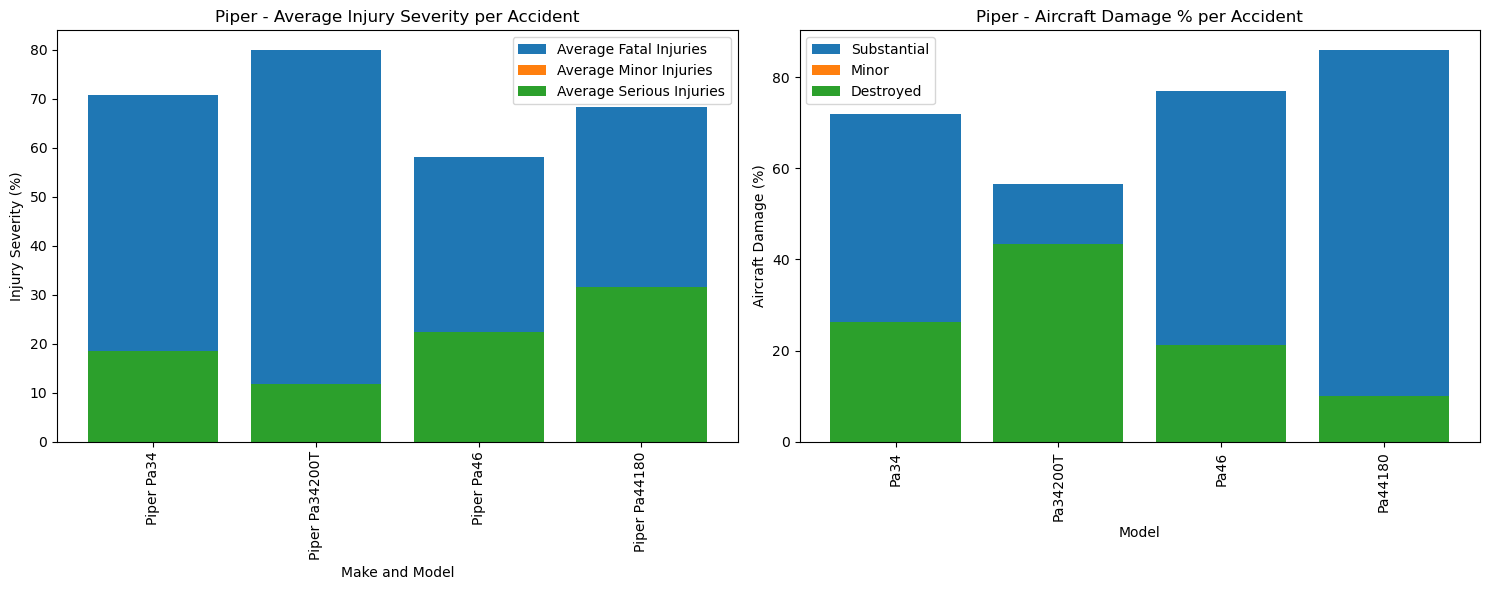

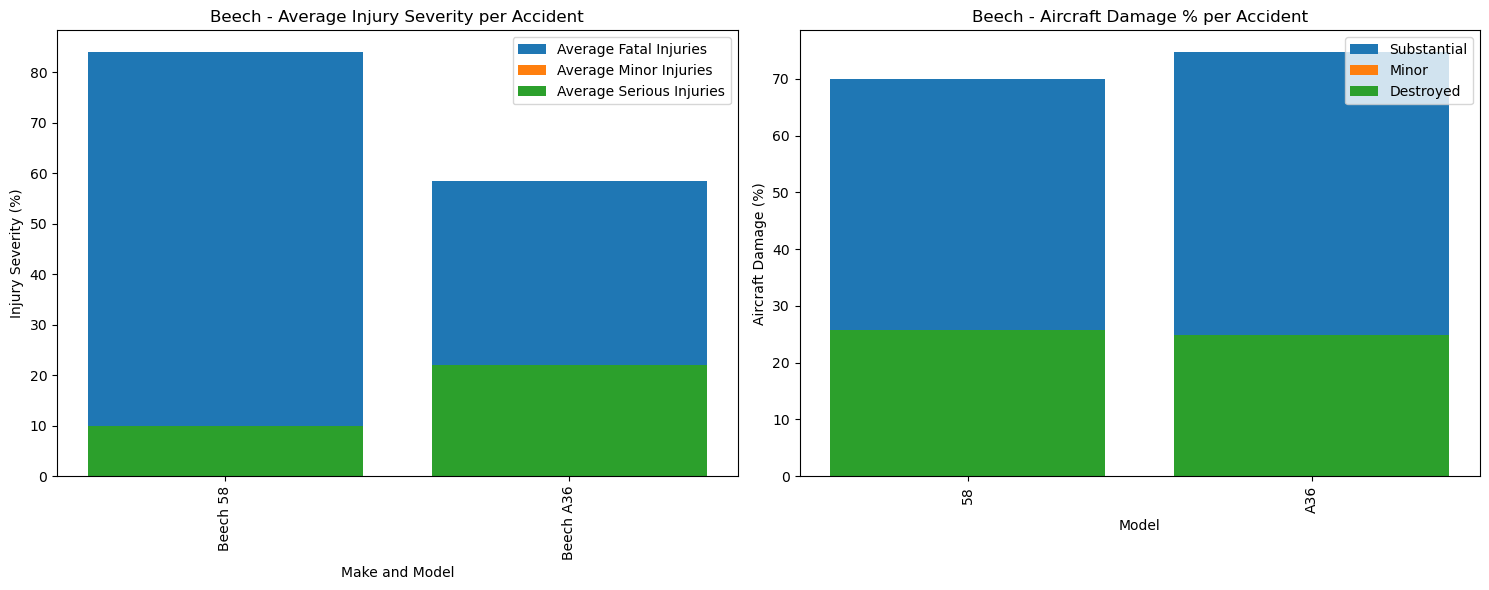

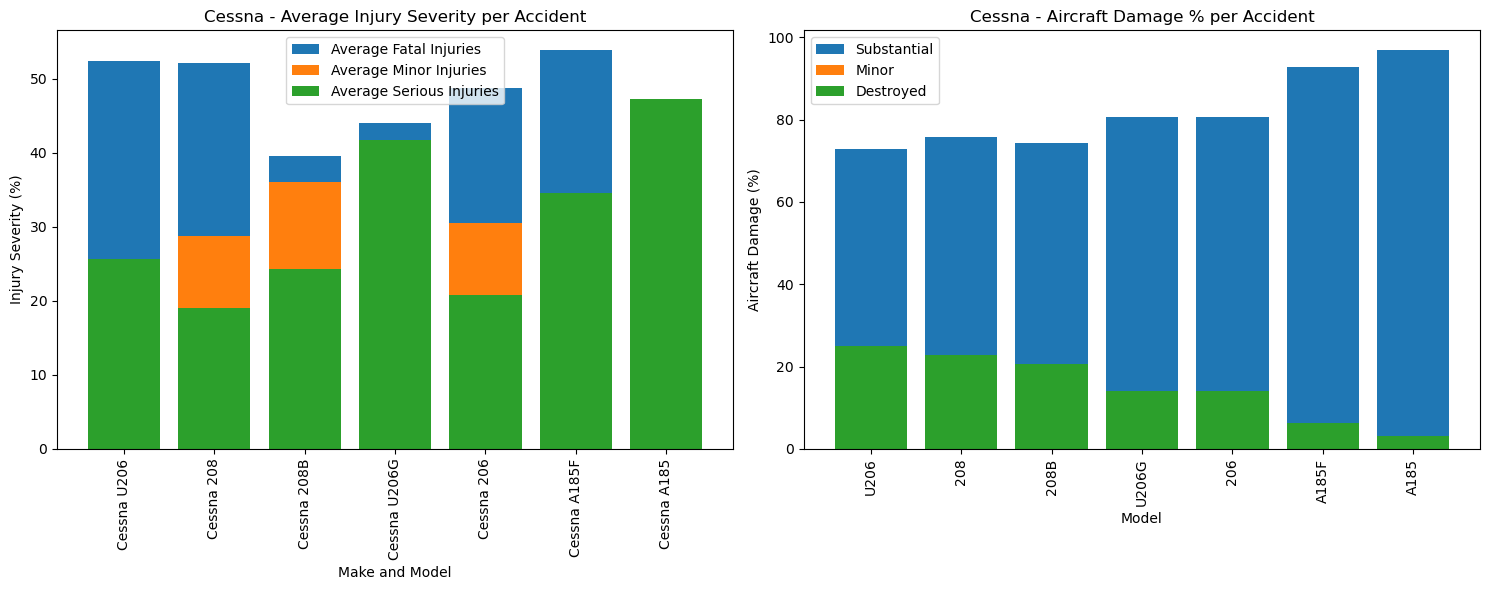

In [114]:
import matplotlib.ticker as mtick

unique_makes = df_filtered['make'].unique()

for make in unique_makes:
    make_data = df_filtered[df_filtered['make'] == make]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # First subplot
    total_injuries = make_data[['avg_fatal_injuries', 'avg_minor_injuries', 'avg_serious_injuries']].sum(axis=1)
    normalized_injuries = make_data[['avg_fatal_injuries', 'avg_minor_injuries', 'avg_serious_injuries']].div(total_injuries, axis=0) * 100
    ax1.bar(make_data['make'] + ' ' + make_data['model'], normalized_injuries['avg_fatal_injuries'], label='Average Fatal Injuries')
    ax1.bar(make_data['make'] + ' ' + make_data['model'], normalized_injuries['avg_minor_injuries'], label='Average Minor Injuries')
    ax1.bar(make_data['make'] + ' ' + make_data['model'], normalized_injuries['avg_serious_injuries'], label='Average Serious Injuries')
    ax1.set_xlabel('Make and Model')
    ax1.set_ylabel('Injury Severity (%)')
    ax1.set_title(f'{make} - Average Injury Severity per Accident')
    ax1.set_xticks(make_data['make'] + ' ' + make_data['model'])
    ax1.set_xticklabels(make_data['make'] + ' ' + make_data['model'], rotation=90)
    ax1.legend()

    # Second subplot
    total_damage = make_data[['Substantial', 'Minor', 'Destroyed']].sum(axis=1)
    normalized_damage = make_data[['Substantial', 'Minor', 'Destroyed']].div(total_damage, axis=0) * 100
    ax2.bar(make_data['model'], normalized_damage['Substantial'], label='Substantial')
    ax2.bar(make_data['model'], normalized_damage['Minor'], label='Minor')
    ax2.bar(make_data['model'], normalized_damage['Destroyed'], label='Destroyed')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('Aircraft Damage (%)')
    ax2.set_title(f'{make} - Aircraft Damage % per Accident')
    ax2.set_xticks(make_data['model'])
    ax2.set_xticklabels(make_data['model'], rotation=90)
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.ticker as mtick

unique_makes = df_filtered['make'].unique()

for make in unique_makes:
    make_data = df_filtered[df_filtered['make'] == make]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # First subplot
    total_injuries = make_data[['avg_fatal_injuries', 'avg_minor_injuries', 'avg_serious_injuries']].sum(axis=1)
    normalized_injuries = make_data[['avg_fatal_injuries', 'avg_minor_injuries', 'avg_serious_injuries']].div(total_injuries, axis=0) * 100
    ax1.bar(make_data['make'] + ' ' + make_data['model'], normalized_injuries['avg_fatal_injuries'], label='Average Fatal Injuries')
    ax1.bar(make_data['make'] + ' ' + make_data['model'], normalized_injuries['avg_minor_injuries'], label='Average Minor Injuries')
    ax1.bar(make_data['make'] + ' ' + make_data['model'], normalized_injuries['avg_serious_injuries'], label='Average Serious Injuries')
    ax1.set_xlabel('Make and Model')
    ax1.set_ylabel('Injury Severity (%)')
    ax1.set_title(f'{make} - Average Injury Severity per Accident')
    ax1.set_xticks(make_data['make'] + ' ' + make_data['model'])
    ax1.set_xticklabels(make_data['make'] + ' ' + make_data['model'], rotation=90)
    ax1.legend()

    # Add y-axis percentages on top of the bars in the first subplot
    for i, v in enumerate(normalized_injuries['avg_fatal_injuries']):
        ax1.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    for i, v in enumerate(normalized_injuries['avg_minor_injuries']):
        ax1.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    for i, v in enumerate(normalized_injuries['avg_serious_injuries']):
        ax1.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

    # Second subplot
    total_damage = make_data[['Substantial', 'Minor', 'Destroyed']].sum(axis=1)
    normalized_damage = make_data[['Substantial', 'Minor', 'Destroyed']].div(total_damage, axis=0) * 100
    ax2.bar(make_data['model'], normalized_damage['Substantial'], label='Substantial')
    ax2.bar(make_data['model'], normalized_damage['Minor'], label='Minor')
    ax2.bar(make_data['model'], normalized_damage['Destroyed'], label='Destroyed')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('Aircraft Damage (%)')
    ax2.set_title(f'{make} - Aircraft Damage % per Accident')
    ax2.set_xticks(make_data['model'])
    ax2.set_xticklabels(make_data['model'], rotation=90)
    ax2.legend()

    # Add y-axis percentages on top of the bars in the second subplot
    for i, v in enumerate(normalized_damage['Substantial']):
        ax2.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    for i, v in enumerate(normalized_damage['Minor']):
        ax2.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    for i, v in enumerate(normalized_damage['Destroyed']):
        ax2.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()